In [47]:
import sklearn
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.applications import VGG16
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import silhouette_score

In [2]:
test_data = "/content/drive/MyDrive/Train_Test/Test"

In [3]:
vgg=VGG16(include_top = False, weights='imagenet', pooling='avg')

for layer in vgg.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [4]:
df = pd.DataFrame({'ImageName':[], 'FlattenImage':[], 'Labels':[]})

In [33]:
def extractFeatures(imagepath, h, w):
  img = load_img(imagepath, target_size = (h, w))
  img = img_to_array(img)
  img = np.expand_dims(img, 0)
  img = tf.keras.applications.vgg16.preprocess_input(img)
  extracted_features = vgg.predict(img)
  extracted_features = np.array(extracted_features)
  extracted_features = extracted_features.flatten()
  return extracted_features


In [36]:
def preprocessImages(path):
  images = os.listdir(path)
  image_list = []
  features_list = []

  for image in images:
    image_list.append(image)
    imagePath = os.path.join(path, image)
    features = extractFeatures(imagePath, 224, 224)
    features_list.append(features)

  output = pd.DataFrame({'ImageName':image_list, 'Features': features_list })
  return output


In [13]:
os.listdir("/content/drive/MyDrive/Train_Test/Test")

['test1.jpeg', '2.jpeg', '3.jpeg', '4.jpeg', '5.jpeg', '6.jpeg', '7.jpeg']

In [37]:
df = preprocessImages(test_data)
df

1/1 [==============================] - 0s 372ms/step


,ImageName,Features
0,test1.jpeg,"[0.15576407, 0.083986275, 0.1434792, 0.3255951..."
1,2.jpeg,"[0.8562245, 0.5874538, 2.491268, 0.0, 1.735137..."
2,3.jpeg,"[1.9622941, 0.8230484, 1.3525479, 0.0, 8.55434..."
3,4.jpeg,"[0.0, 1.7725484, 7.9464993, 0.33202285, 0.7401..."
4,5.jpeg,"[0.18730405, 0.0, 2.9080985, 0.0, 1.9447206, 1..."
5,6.jpeg,"[0.2548949, 2.4777665, 9.4131155, 0.0, 2.16606..."
6,7.jpeg,"[1.9214864, 0.25128448, 7.547196, 0.16064484, ..."


In [45]:
features = np.array(df['Features'].tolist())

In [49]:
num_labels = 7

In [50]:
silh_scores = []
K = range(2, num_labels)
for k in K:
  km = KMeans(n_clusters = k)
  km.fit(features)
  scores = silhouette_score(features, km.labels_)
  silh_scores.append(scores)

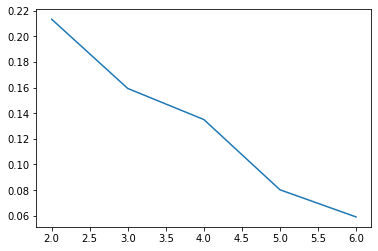

In [51]:
plt.plot(K, silh_scores)
plt.show()

In [52]:
true_K_by_KMeans = 2


In [53]:
silh_scores = []
K = range(2, num_labels)
for k in K:
  km = AgglomerativeClustering(n_clusters = k)
  km.fit(features)
  scores = silhouette_score(features, km.labels_)
  silh_scores.append(scores)

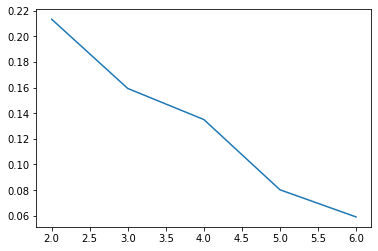

In [54]:
plt.plot(K, silh_scores)
plt.show()

In [56]:
true_K_by_AgglomerativeClustering = 2

In [57]:
km = AgglomerativeClustering(n_clusters =true_K_by_AgglomerativeClustering )
km.fit(features)

AgglomerativeClustering()

In [58]:
labels = km.labels_
labels

array([1, 0, 0, 0, 0, 0, 0])

In [59]:
df['Labels'] = labels
df

,ImageName,Features,Labels
0,test1.jpeg,"[0.15576407, 0.083986275, 0.1434792, 0.3255951...",1
1,2.jpeg,"[0.8562245, 0.5874538, 2.491268, 0.0, 1.735137...",0
2,3.jpeg,"[1.9622941, 0.8230484, 1.3525479, 0.0, 8.55434...",0
3,4.jpeg,"[0.0, 1.7725484, 7.9464993, 0.33202285, 0.7401...",0
4,5.jpeg,"[0.18730405, 0.0, 2.9080985, 0.0, 1.9447206, 1...",0
5,6.jpeg,"[0.2548949, 2.4777665, 9.4131155, 0.0, 2.16606...",0
6,7.jpeg,"[1.9214864, 0.25128448, 7.547196, 0.16064484, ...",0
